In [144]:
import numpy as np
import glob
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [145]:
data = [
    {
        'label': 'apple',
        'directory': './photo_data/apples/',
        'data': []
    },
    {
        'label': 'desk',
        'directory': './photo_data/desks/',
        'data': []
    },
    {
        'label': 'classroom',
        'directory': './photo_data/classroomes/',
        'data': []
    },
    
]

for cluster_info in data:
    path = cluster_info['directory']
    for img in os.listdir(path):
        pic = cv2.imread(os.path.join(path,img))
        pic = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
        pic = cv2.resize(pic,(80,80))
        cluster_info['data'].append(pic.reshape(1, -1)[0])

In [146]:
from sklearn.manifold import TSNE

In [147]:
tsne = TSNE(n_components=2).fit_transform(data[0]['data'] + data[1]['data'] + data[2]['data'])

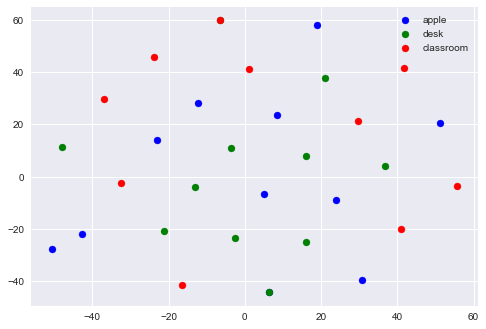

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['b', 'g', 'r']

for i in range(len(data)):
    ax.scatter(tsne[i*10:i*10+11, 0], tsne[i*10:i*10+11, 1], c=colors[i], label=data[i]['label'])
ax.legend(loc='best')
plt.show()